In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [316]:
raw_data = pd.read_csv("california_housing_sklearn.csv")
raw_data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  SalePrice  
0    -122.23      4.526  
1    -122.22      3.585  
2    -122.24      3.521  
3    -122.25      3.413  
4    -122.25      3.422

##### Here we have MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude and Longitude as Independent Variables and We need to predict the SalePrice.

In [317]:
raw_data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude     SalePrice  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

# Data Preprocessing

In [318]:
q1 = raw_data['AveRooms'].quantile(0.99)
q2 = raw_data['Population'].quantile(0.99)
q3 = raw_data['AveOccup'].quantile(0.99)
q4 = raw_data['AveBedrms'].quantile(0.99)
q5 = raw_data['MedInc'].quantile(0.99)
q6 = raw_data['SalePrice'].quantile(0.99)


df1 = raw_data[raw_data['AveRooms']<q1]
df2 = df1[df1['Population']<q2]
df3 = df2[df2['AveOccup']<q3]
df4 = df3[df3['AveBedrms']<q4]
df5 = df4[df4['MedInc']<q5]
pre_processed_data = df5[df5['SalePrice']<q6]

In [319]:
pre_processed_data = pre_processed_data.reset_index()
pre_processed_data.drop('index', axis='columns', inplace=True)

In [320]:
pre_processed_data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  19039.000000  19039.000000  19039.000000  19039.000000  19039.000000   
mean       3.668537     28.670361      5.208585      1.064384   1377.779820   
std        1.546480     12.419429      1.163374      0.116863    866.277618   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.524750     18.000000      4.410319      1.004951    802.000000   
50%        3.447100     29.000000      5.167785      1.047521   1176.000000   
75%        4.581300     37.000000      5.939502      1.096636   1720.500000   
max       10.594100     52.000000     10.352941      2.127208   5804.000000   

           AveOccup      Latitude     Longitude     SalePrice  
count  19039.000000  19039.000000  19039.000000  19039.000000  
mean       2.912579     35.648358   -119.579541      1.929959  
std        0.695627      2.144776      2.005429      0.979086  
min        0.750000     32.540000   -124.350000      0.149990  
25%        2.443902     33.930000   -121.790000      1.163000  
50%        2.832298     34.270000   -118.510000      1.745000  
75%        3.289303     37.730000   -118.010000      2.495500  
max        5.392954     41.950000   -114.550000      5.000000

##### We can see the outliers has been removed

In [321]:
pre_processed_data['HouseAge'].unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 45., 24., 33., 15., 14.,
       13., 18., 25., 12.,  5.,  6.,  8.,  9.,  4.,  7.,  3., 11.,  1.])

In [322]:
df = pre_processed_data[['HouseAge']]
bin_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [323]:
df['HouseAge'] = pd.cut(pre_processed_data['HouseAge'],bins=10,precision=0,labels=bin_labels)
pre_processed_data['HouseAge'] = df[['HouseAge']]

<ipython-input-323-f7bda4d5aa45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HouseAge'] = pd.cut(pre_processed_data['HouseAge'],bins=10,precision=0,labels=bin_labels)


In [324]:
pre_processed_data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

##### The data donot have any NULL value

# Data Visualization

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

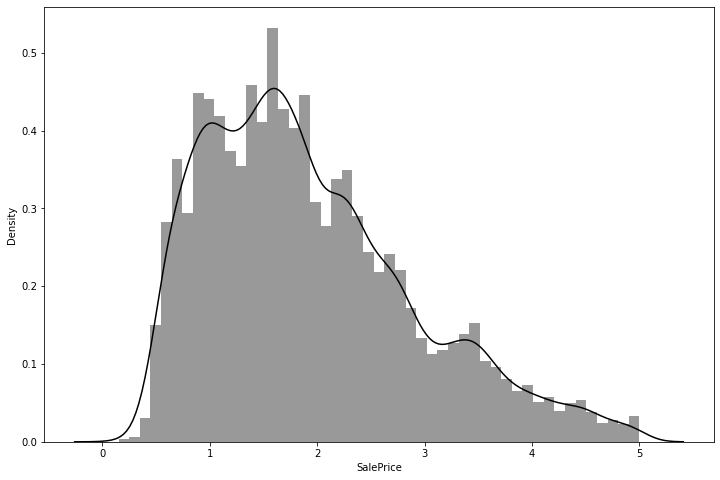

In [325]:
plt.figure(figsize=(12,8))
sns.distplot(pre_processed_data["SalePrice"],color='black')

<AxesSubplot:xlabel='MedInc', ylabel='SalePrice'>

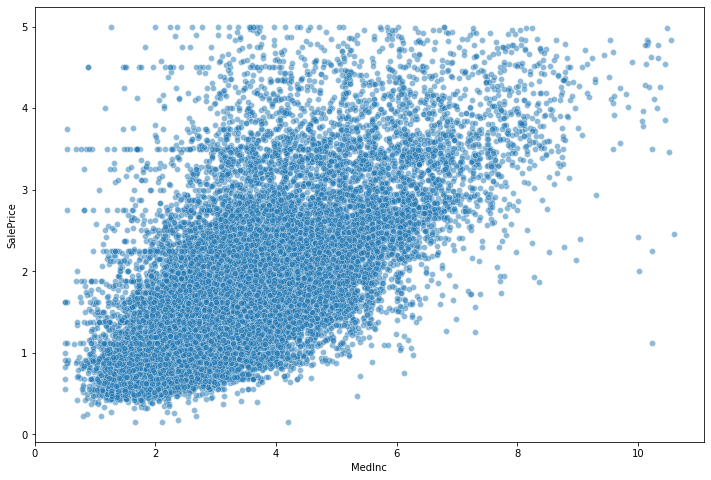

In [326]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='MedInc',y='SalePrice', data = pre_processed_data, alpha=0.5)

###### We can clearly see that the graph shows a linear relation. It means MedInc is a important parameter



/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


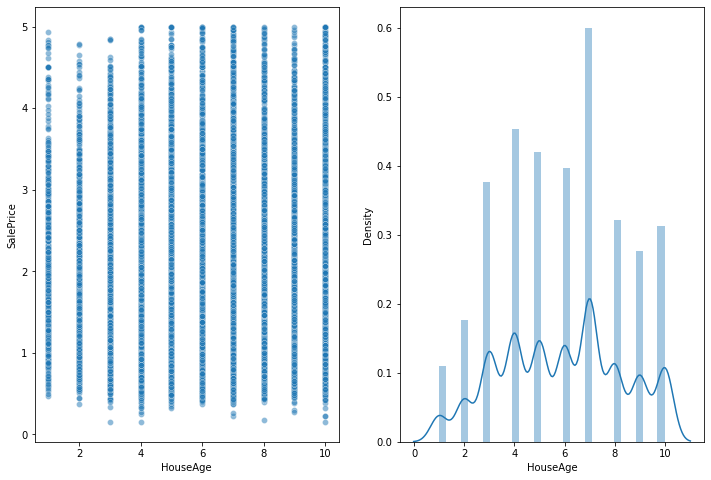

In [327]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(x='HouseAge',y='SalePrice', data=pre_processed_data,alpha=0.5)
plt.subplot(1,2,2)
sns.distplot(pre_processed_data['HouseAge'])
plt.show()

<AxesSubplot:xlabel='HouseAge', ylabel='SalePrice'>

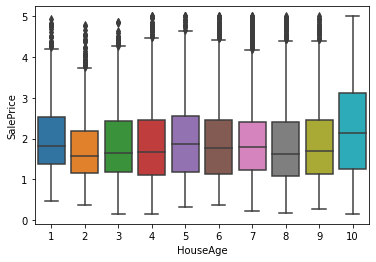

In [328]:
sns.boxplot(x='HouseAge',y='SalePrice', data=pre_processed_data)

##### We can see that the HouseAge is randomly Distributed in the Graph. Which is not giving any relation between House age and Scale Price.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


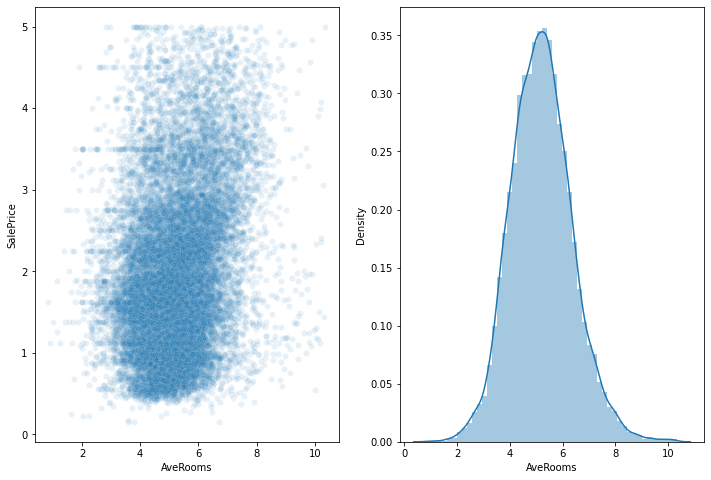

In [329]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(x='AveRooms', y='SalePrice', data=pre_processed_data, alpha=0.1)
plt.subplot(1,2,2)
sns.distplot(pre_processed_data['AveRooms'])
plt.show()

##### We can see that AveRooms is randomly distributed But Price of most of the House with more than 8 rooms is less than 2.5 .

<AxesSubplot:xlabel='AveBedrms', ylabel='SalePrice'>

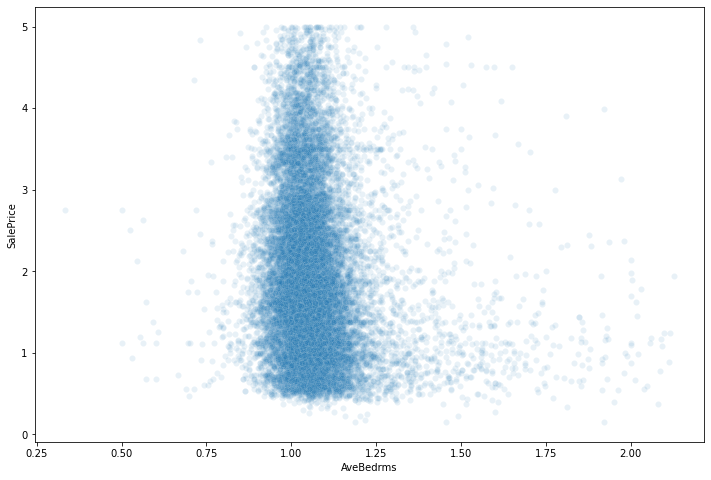

In [330]:
plt.figure(figsize=(12,8))
#plt.subplot(1,2,1)
sns.scatterplot(x='AveBedrms',y='SalePrice', data=pre_processed_data,alpha=0.1)
#plt.subplot(1,2,2)
#sns.distplot(pre_processed_data['AveBedrms'])
#plt.show();

<AxesSubplot:xlabel='SalePrice', ylabel='AveBedrms'>

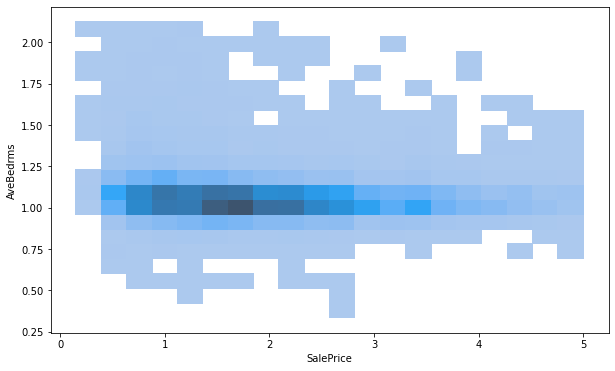

In [331]:
plt.figure(figsize=(10,6))
sns.histplot(data=pre_processed_data, x='SalePrice', y='AveBedrms', bins=20)

##### Here we can see price of many Houses with more than 1.25   Avebedrooms is between 0 and 2.5.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


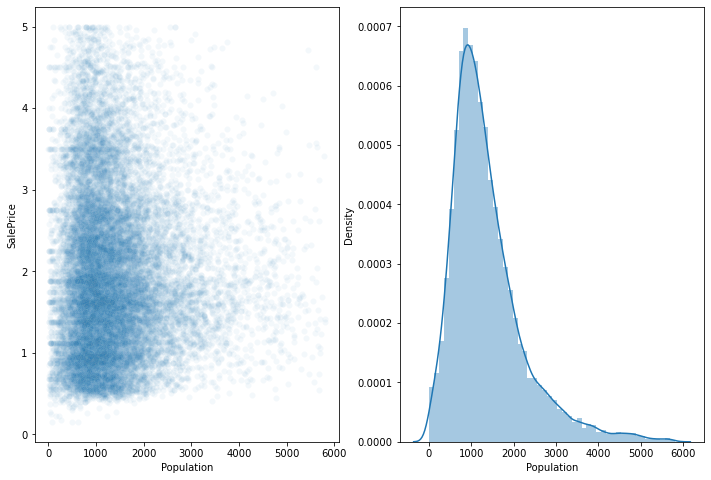

In [332]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(x='Population',y='SalePrice', data=pre_processed_data,alpha=0.05)
plt.subplot(1,2,2)
sns.distplot(pre_processed_data['Population'])
plt.show()

<AxesSubplot:xlabel='Population', ylabel='SalePrice'>

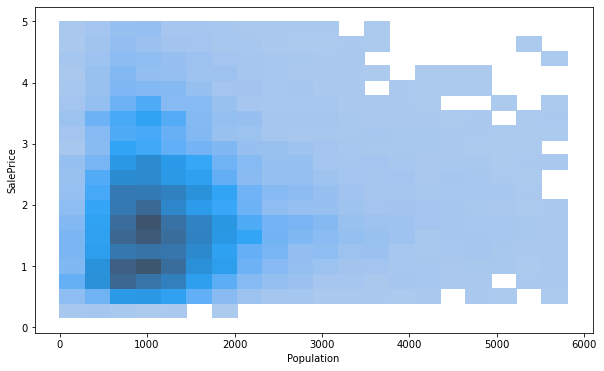

In [333]:
plt.figure(figsize=(10,6))
sns.histplot(data=pre_processed_data, x='Population', y='SalePrice', bins=20)

##### We can see that many houses in highly populated area have less SalePrice which is counterintuitive. It may be beacuse most of our SalePrice data ranges between 0.5-2.5.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


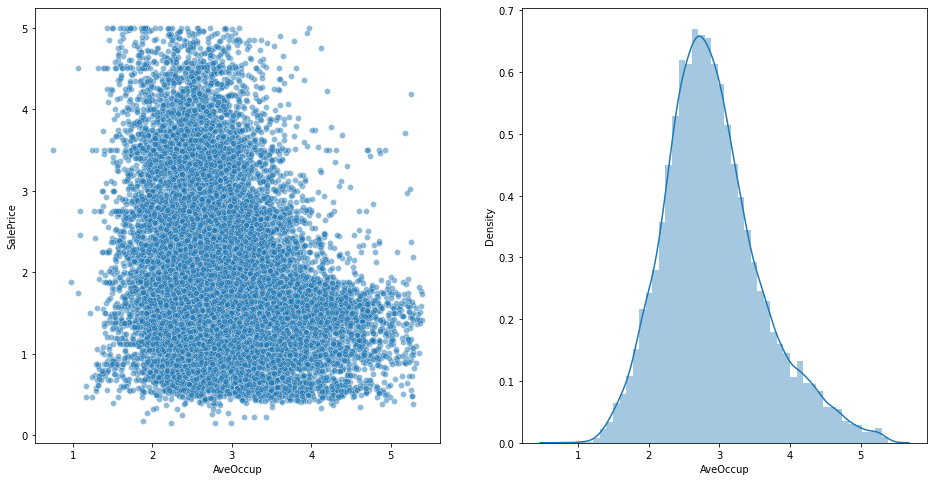

In [334]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x='AveOccup',y='SalePrice', data=pre_processed_data,alpha=0.5)
plt.subplot(1,2,2)
sns.distplot(pre_processed_data['AveOccup'])
plt.show()

##### We can see that as AveOccup is incresing the SalePrice is decreasing. And most of the house's Saleprice with more than 4 AveOccup is less than 2.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

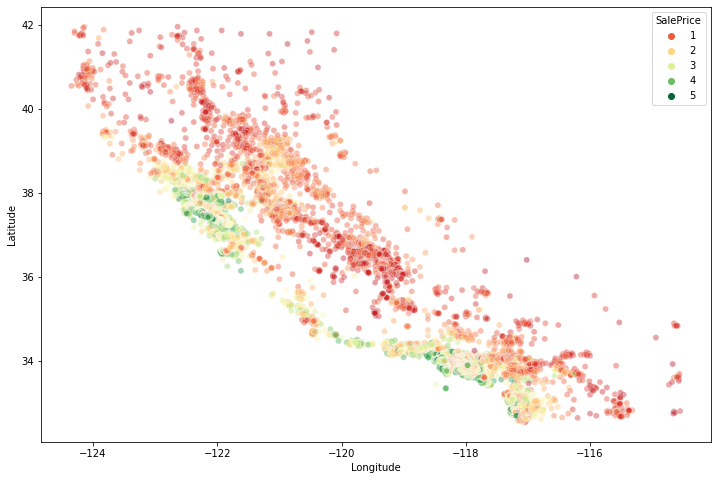

In [335]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=pre_processed_data, x='Longitude',y='Latitude',hue='SalePrice',palette='RdYlGn',alpha=0.4)

##### Here we can in see two clusters where Sale price is greater than equal to 3. It means Location matters alot. 

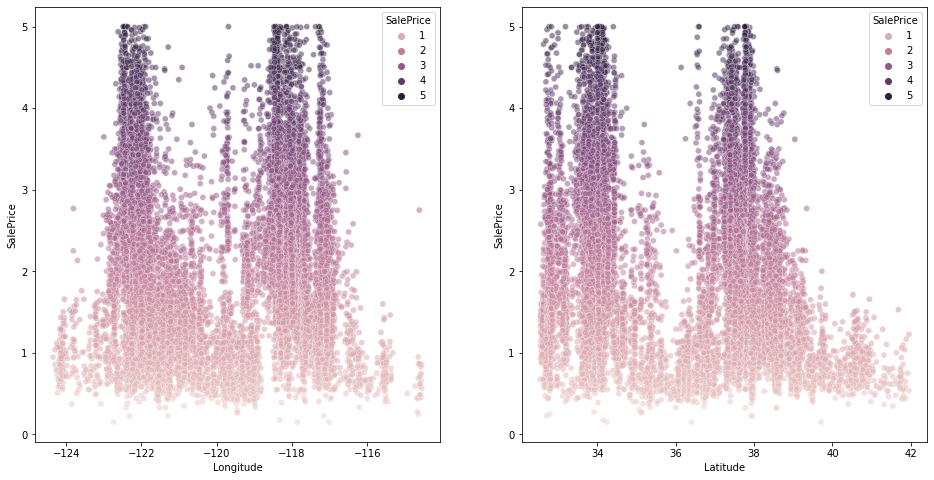

In [336]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x='Longitude',y='SalePrice', data=pre_processed_data, alpha=0.5, hue='SalePrice')
plt.subplot(1,2,2)
sns.scatterplot(x='Latitude',y='SalePrice', data=pre_processed_data, alpha=0.5, hue='SalePrice')
plt.show()

##### We can see that in the Upper part of both the graph the scatter are narrow which means only a specific location have costly houses.







<Figure size 864x576 with 0 Axes>

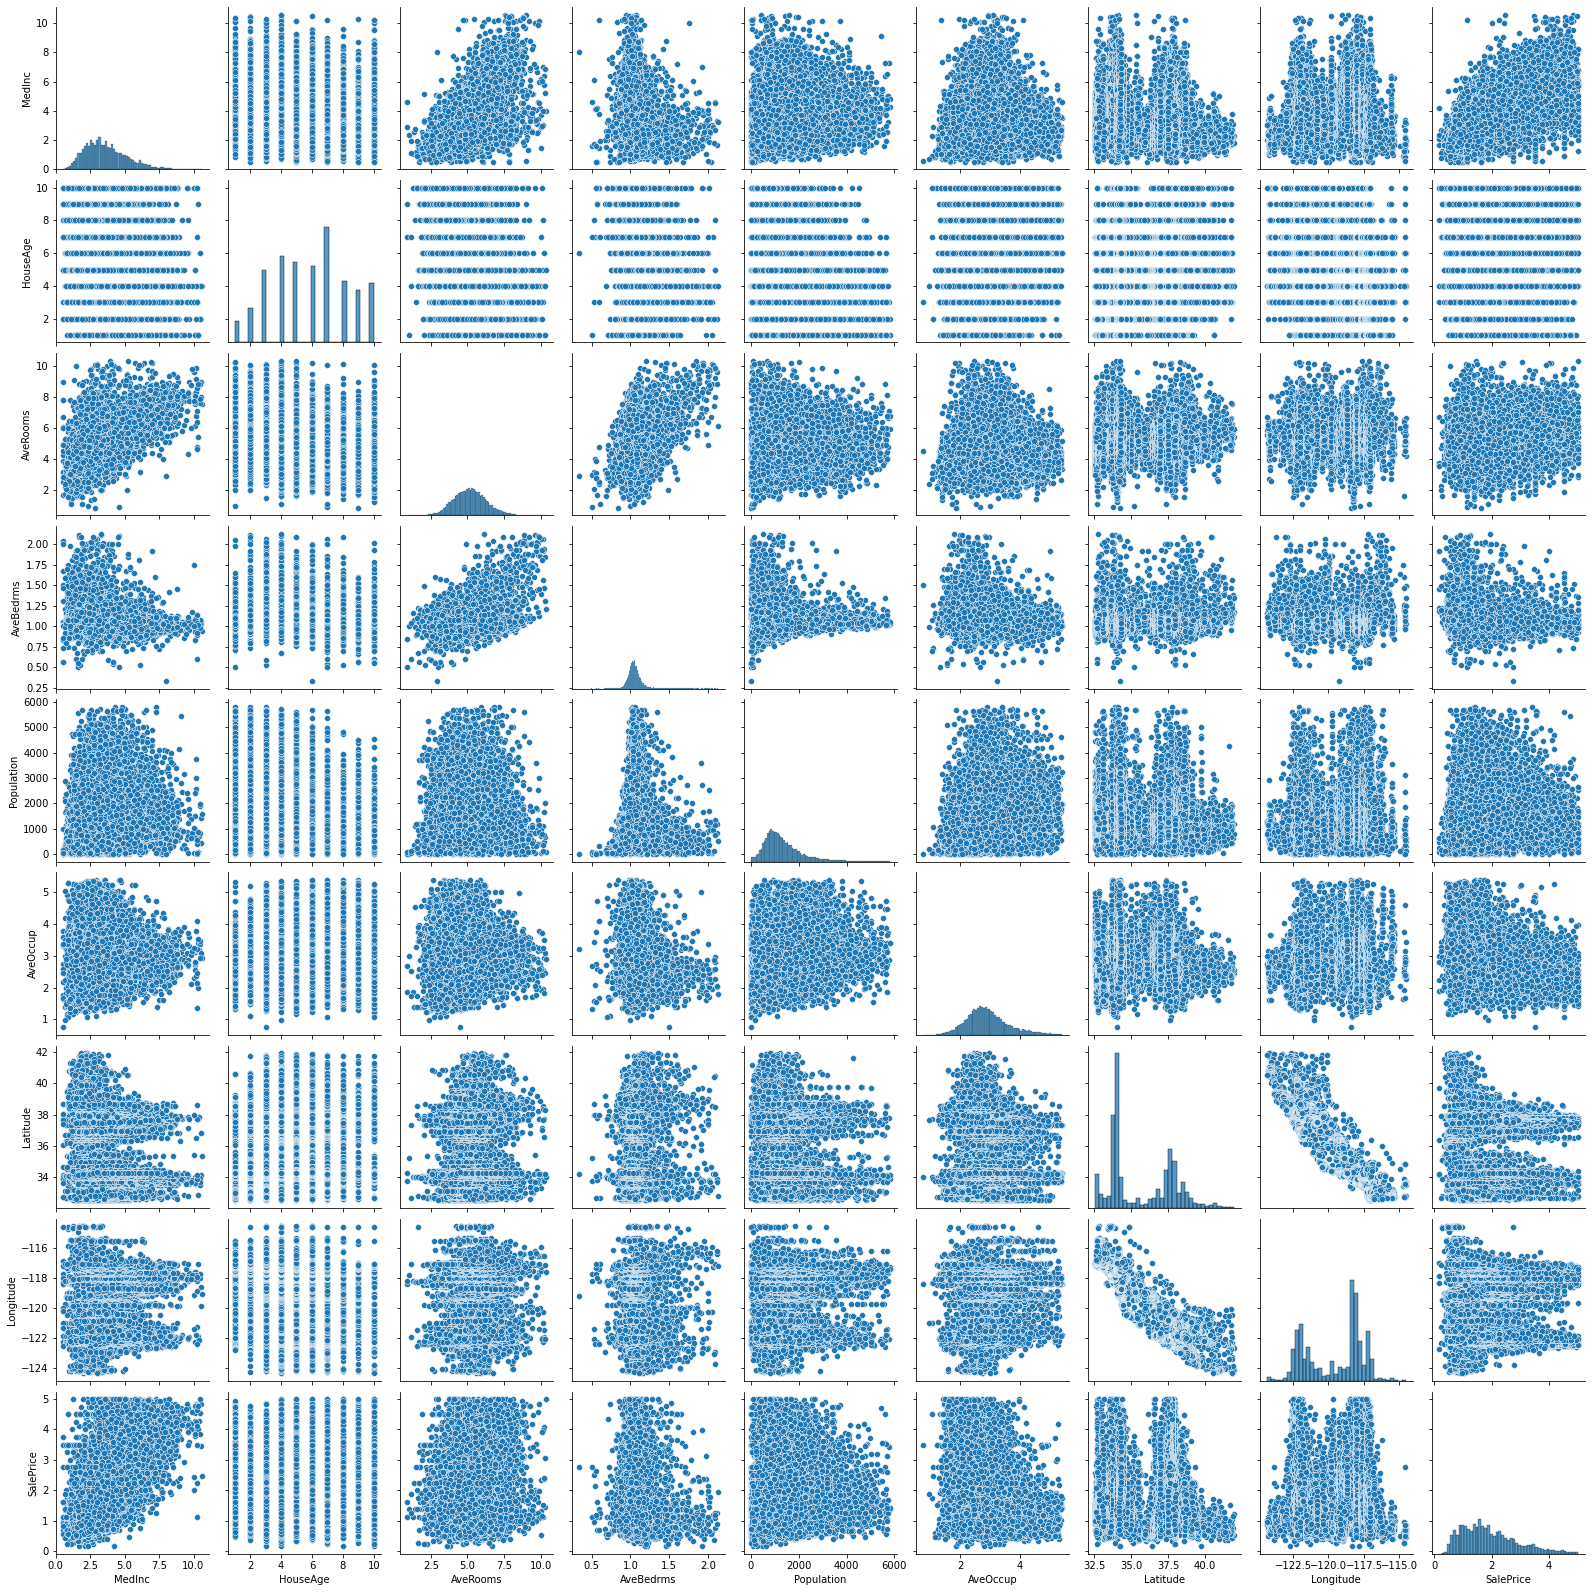

In [337]:
plt.figure(figsize=(12,8))
sns.pairplot(pre_processed_data)

<AxesSubplot:>

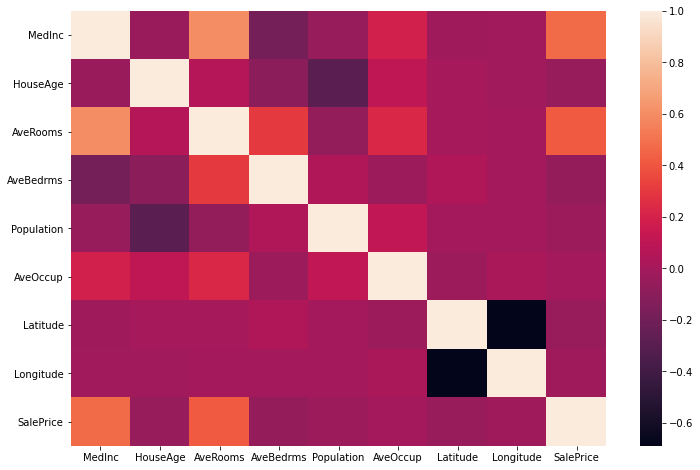

In [338]:
correlation = pre_processed_data.diff().corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation)

# Data Processing

## Splitting Data

In [339]:
pre_processed_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'SalePrice'],
      dtype='object')

In [340]:
X = pre_processed_data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]
y = pre_processed_data[['SalePrice']]

In [341]:
'HouseAge','AveRooms','AveBedrms', 'Latitude',

('HouseAge', 'AveRooms', 'AveBedrms', 'Latitude')

In [342]:
from sklearn.model_selection import train_test_split

In [343]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size= 0.05)

In [344]:
x_train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
15752  4.8966         9  6.176647   1.041916      1722.0  2.577844     37.48   
8502   3.7043         3  6.387037   1.107407      1502.0  2.781481     34.49   
5685   6.1076         5  6.134907   0.939292      1993.0  3.360877     33.98   
7015   2.2847         7  3.696356   1.080972      3423.0  4.619433     33.93   
17053  2.5599         9  2.826446   0.966942      2312.0  4.776860     36.91   
...       ...       ...       ...        ...         ...       ...       ...   
6344   2.7483         6  4.106509   1.111440      2934.0  2.893491     34.09   
8004   2.6182         7  3.234000   0.986000      1530.0  3.060000     33.91   
5570   3.3654         3  5.356401   1.115340      2855.0  3.292964     34.14   
8911   3.2852         4  5.535326   1.060688      2950.0  2.672101     37.33   
18857  3.6761         4  4.474715   1.117455      1798.0  2.933116     34.27   

       Longitude  
15752    -122.24  
8502     -117.89  
5685     -117.84  
7015     -118.21  
17053    -121.75  
...          ...  
6344     -118.14  
8004     -118.30  
5570     -117.89  
8911     -120.46  
18857    -118.78  

[18087 rows x 8 columns]

## Scaling

In [345]:
from sklearn.preprocessing import StandardScaler

In [346]:
scaler = StandardScaler()

In [347]:
scaled_train_input = scaler.fit_transform(x_train)

In [348]:
scaled_test_input = scaler.transform(x_test)

In [349]:
scaled_train_input[0]

array([ 0.79662733,  1.27602292,  0.83081706, -0.19352412,  0.40143969,
       -0.48259208,  0.8494663 , -1.32343921])

# Creating a Model

## Regression Model

In [350]:
from sklearn.linear_model import LinearRegression

In [351]:
regression = LinearRegression()

In [352]:
reg = regression.fit(scaled_train_input, y_train)

In [353]:
reg.score(scaled_train_input, y_train)

0.6370620649227237

In [354]:
prediction = reg.predict(scaled_test_input)

In [355]:
pred = pd.DataFrame(data=prediction, columns=['SalePrice'])

In [356]:
y_test = y_test.reset_index()
y_test = y_test.drop('index',axis='columns')

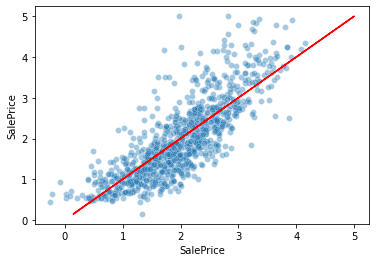

In [357]:
sns.scatterplot(x = pred['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

## ANN

In [358]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [359]:
model = Sequential()

model.add(Dense(16,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'relu'))

model.compile(optimizer = 'Adam', loss='mse')

### Training model

In [360]:
from tensorflow.keras.callbacks import EarlyStopping

In [361]:
earlystopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [362]:
model.fit(scaled_train_input, y_train, batch_size=128,epochs=400, callbacks = earlystopping, validation_split=0.2)

Epoch 1/400
114/114 [==============================] - 1s 3ms/step - loss: 3.4479 - val_loss: 1.7258
Epoch 2/400
114/114 [==============================] - 0s 4ms/step - loss: 2.0498 - val_loss: 0.8163
Epoch 3/400
114/114 [==============================] - 0s 3ms/step - loss: 1.4015 - val_loss: 0.6016
Epoch 4/400
114/114 [==============================] - 0s 3ms/step - loss: 1.1064 - val_loss: 0.5267
Epoch 5/400
114/114 [==============================] - 0s 3ms/step - loss: 0.9817 - val_loss: 0.4735
Epoch 6/400
114/114 [==============================] - 0s 3ms/step - loss: 0.8440 - val_loss: 0.4258
Epoch 7/400
114/114 [==============================] - 0s 3ms/step - loss: 0.7853 - val_loss: 0.4045
Epoch 8/400
114/114 [==============================] - 0s 3ms/step - loss: 0.7594 - val_loss: 0.3891
Epoch 9/400
114/114 [==============================] - 0s 3ms/step - loss: 0.6419 - val_loss: 0.3682
Epoch 10/400
114/114 [==============================] - 0s 2ms/step - loss: 0.6097 - val_lo

In [363]:
losses = pd.DataFrame(model.history.history)

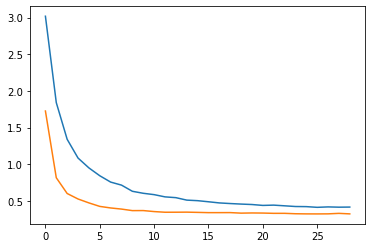

In [364]:
plt.plot(losses)

In [365]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [366]:
prediction2 = model.predict(scaled_test_input)

In [367]:
pred2 = pd.DataFrame(data=prediction2, columns=['SalePrice'])

In [368]:
mean_absolute_error(y_test,prediction2)

0.40406511407715945

In [369]:
explained_variance_score(y_test,prediction2)

0.681206485964718

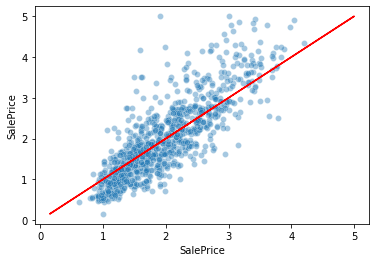

In [370]:
sns.scatterplot(x = pred2['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

## DecisionTree Regression

In [371]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [385]:
regr3 = DecisionTreeRegressor(max_depth=8)
regr4 = DecisionTreeRegressor(max_depth=20)

In [386]:
regr3.fit(scaled_train_input, y_train)
regr4.fit(scaled_train_input, y_train)

DecisionTreeRegressor(max_depth=20)

In [387]:
print(regr3.score(scaled_train_input, y_train))
print(regr4.score(scaled_train_input, y_train))

0.717882161628533
0.9957990651979685


In [388]:
prediction33 = regr3.predict(scaled_test_input)
prediction34 = regr4.predict(scaled_test_input)

In [389]:
pred33 = pd.DataFrame(data=prediction33, columns=['SalePrice'])
pred34 = pd.DataFrame(data=prediction34, columns=['SalePrice'])

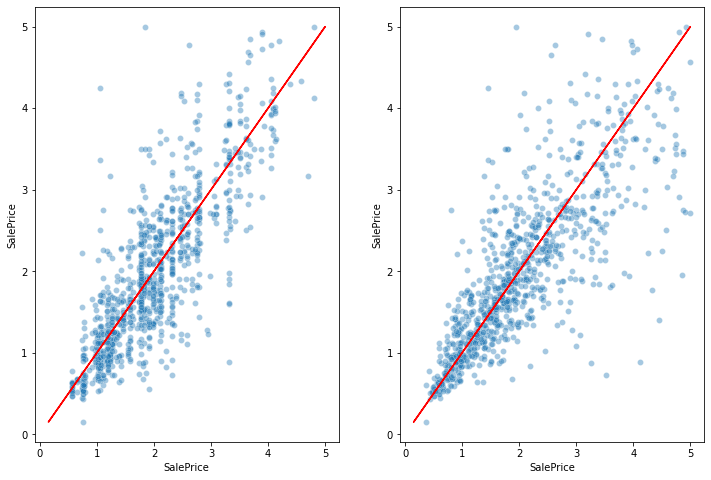

In [390]:
plt.figure(figsize=(12,8))

plt.subplot(121)
sns.scatterplot(x = pred33['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

plt.subplot(122)
sns.scatterplot(x = pred34['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

## RandomForest Regressor

In [391]:
from sklearn.ensemble import RandomForestRegressor

In [392]:
Rreg = RandomForestRegressor(max_depth = 21)
Rreg2 = RandomForestRegressor(max_depth = 8)

In [393]:
Rreg.fit(scaled_train_input, y_train)
Rreg2.fit(scaled_train_input, y_train)

<ipython-input-393-1268d03222b2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rreg.fit(scaled_train_input, y_train)
<ipython-input-393-1268d03222b2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rreg2.fit(scaled_train_input, y_train)


RandomForestRegressor(max_depth=8)

In [394]:
print(Rreg.score(scaled_train_input, y_train))
print(Rreg2.score(scaled_train_input, y_train))

0.9697242914955617
0.7697916839988109


In [395]:
pred41 = pd.DataFrame(data=Rreg.predict(scaled_test_input), columns=['SalePrice'])
pred42 = pd.DataFrame(data=Rreg2.predict(scaled_test_input), columns=['SalePrice'])

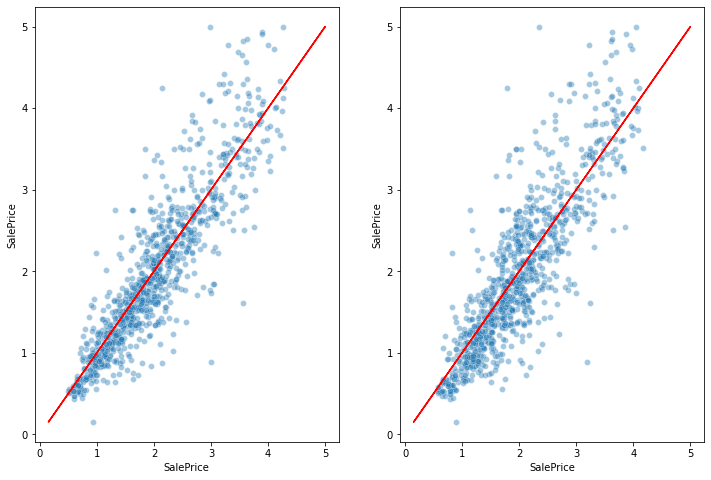

In [396]:
plt.figure(figsize=(12,8))

plt.subplot(121)
sns.scatterplot(x = pred41['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

plt.subplot(122)
sns.scatterplot(x = pred42['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

# Comparing Models

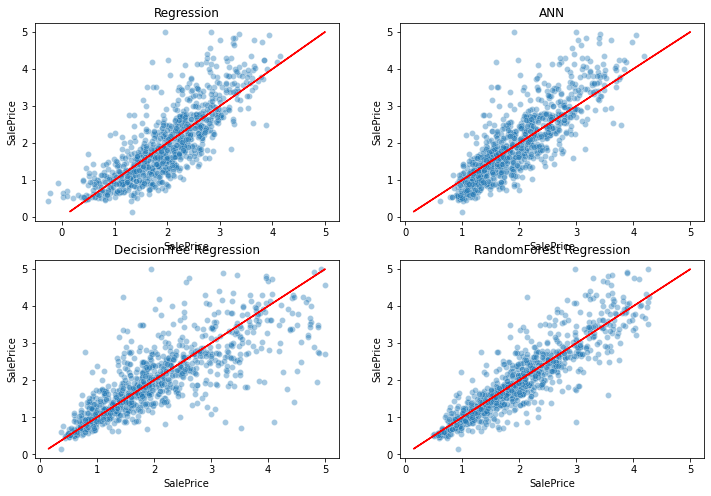

In [397]:
plt.figure(figsize=(12,8))

plt.subplot(221, title='Regression')
sns.scatterplot(x = pred['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

plt.subplot(222, title='ANN')
sns.scatterplot(x = pred2['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

plt.subplot(223, title='DecisionTree Regression')
sns.scatterplot(x = pred34['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

plt.subplot(224, title='RandomForest Regression')
sns.scatterplot(x = pred41['SalePrice'],y= y_test['SalePrice'], alpha = 0.4)
plt.plot(y_test,y_test,color='r')

#### Here we can conclude that RandomForest model with max_depth =  21 has performed well.